## Introduction
    ** We will work with 3 notebooks. **

    . First notebook is related with 'cleaning data'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns
    
    . Second notebook is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.

    . Third notebook is related with 'outliers of data' via Visualisation libraries. Final review 

## Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
df = pd.read_json("scout_car.json", lines=True)

## Check Data

In [4]:
df.head(2)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(15919, 54)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [7]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [8]:
print(*df.columns,sep='\n')

url
make_model
short_description
body_type
price
vat
km
registration
prev_owner
kW
hp
Type
Previous Owners
Next Inspection
Inspection new
Warranty
Full Service
Non-smoking Vehicle
null
Make
Model
Offer Number
First Registration
Body Color
Paint Type
Body Color Original
Upholstery
Body
Nr. of Doors
Nr. of Seats
Model Code
Gearing Type
Displacement
Cylinders
Weight
Drive chain
Fuel
Consumption
CO2 Emission
Emission Class

Comfort & Convenience


Entertainment & Media


Extras


Safety & Security

description
Emission Label
Gears
Country version
Electricity consumption
Last Service Date
Other Fuel Types
Availability
Last Timing Belt Service Date
Available from


In [9]:
df.isnull().sum()

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

#### Rename and Drop Some Useless Columns

In [10]:
df["Comfort&Convenience"] = df["\nComfort & Convenience\n"]
df["Entertainment&Media"] = df["\nEntertainment & Media\n"]
df["Extras"] = df["\nExtras\n"]
df["Safety&Security"] = df["\nSafety & Security\n"]

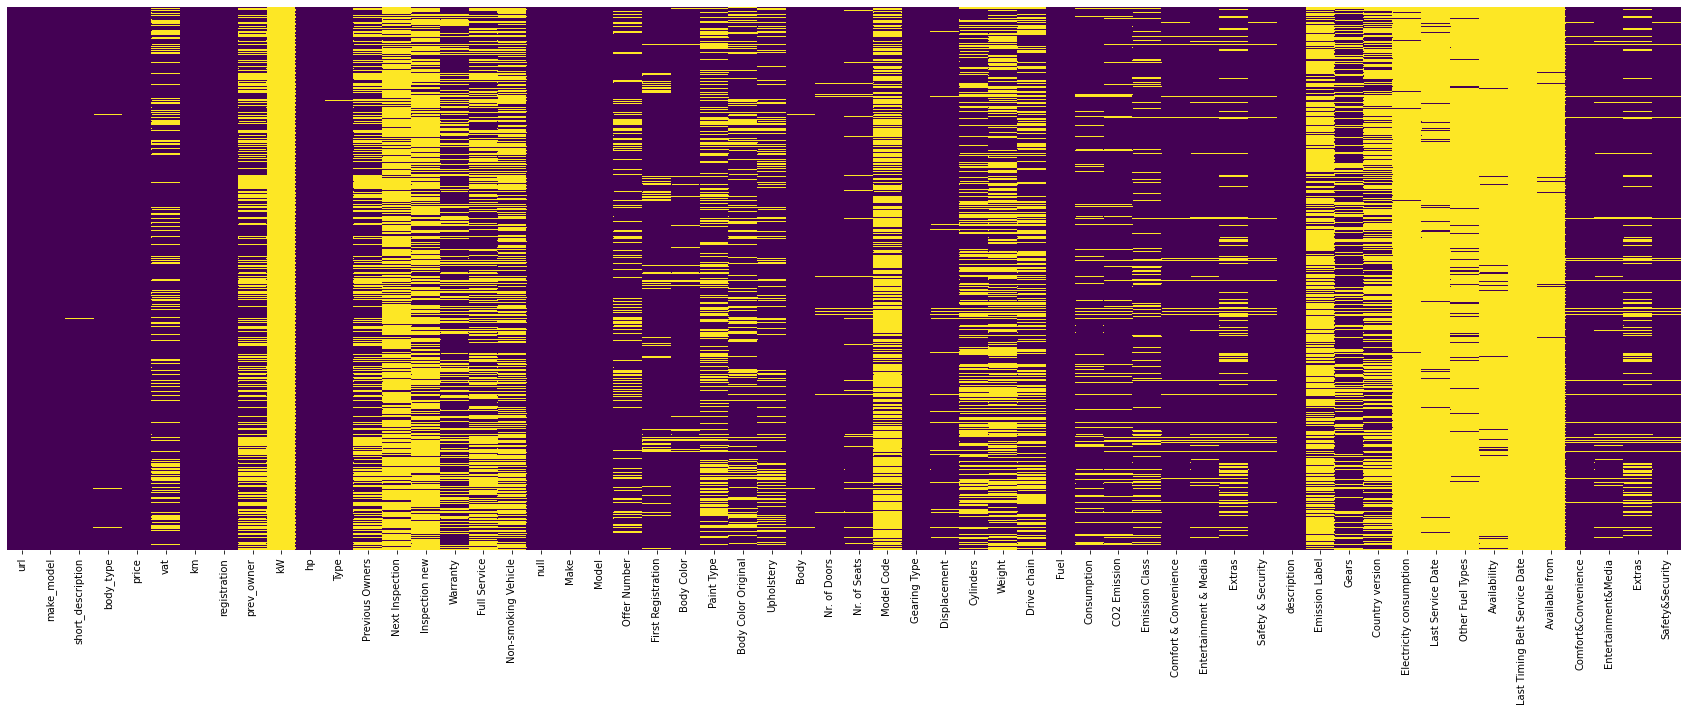

In [11]:
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

> Drop columns that have %65 precentage and higher of missing values.

In [12]:
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]

def perc_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()/serial.shape[0]*100

In [13]:
show_nans(df,65)

kW                               100.000000
Next Inspection                   77.793831
Inspection new                    75.299956
Model Code                        68.729192
Emission Label                    74.967021
Electricity consumption           99.139393
Last Service Date                 96.444500
Other Fuel Types                  94.472015
Availability                      96.011056
Last Timing Belt Service Date     99.899491
Available from                    98.291350
dtype: float64

In [14]:
drop_columns = ["kW", # null
                "prev_owner", # unnecessary
                "Next Inspection", # null
                "null", # useless
                "Body", # unnecessary
                "Full Service", # useless
                "Non-smoking Vehicle", # useless
                "Electricity consumption", # null
                "Last Service Date", # null
                "Other Fuel Types", # null
                "Availability", # null
                "Last Timing Belt Service Date", # null
                "Available from", # null
                "\nComfort & Convenience\n", # unnecessary
                "\nEntertainment & Media\n", # unnecessary
                "\nExtras\n","\nSafety & Security\n", # unnecessary
                "description", # complicated data ---------------------->
               "Body Color Original", # useless
                "Model Code", # useless
                'short_description', # complicated data------------------>
                'registration', # unnecessary
                'Emission Label', # null
                'Country version', # useless
                'Offer Number'] # useless
df.drop(drop_columns, axis = 1, inplace = True)

In [15]:
df.shape

(15919, 33)

## Percentages of Null Data

In [16]:
show_nans(df,0)

url                     0.000000
make_model              0.000000
body_type               0.376908
price                   0.000000
vat                    28.349771
km                      0.000000
hp                      0.000000
Type                    0.012564
Previous Owners        41.711163
Inspection new         75.299956
Warranty               34.047365
Make                    0.000000
Model                   0.000000
First Registration     10.032037
Body Color              3.750236
Paint Type             36.258559
Upholstery             23.368302
Nr. of Doors            1.331742
Nr. of Seats            6.137320
Gearing Type            0.000000
Displacement            3.115774
Cylinders              35.680633
Weight                 43.809285
Drive chain            43.080596
Fuel                    0.000000
Consumption            11.973114
CO2 Emission           11.357497
Emission Class         18.977323
Gears                  29.599849
Comfort&Convenience     5.779257
Entertainm

> At the begining, focus on the columns that have %35 precentage and higher of missing values. 

In [17]:
show_nans(df,35)

Previous Owners    41.711163
Inspection new     75.299956
Paint Type         36.258559
Cylinders          35.680633
Weight             43.809285
Drive chain        43.080596
dtype: float64

## Rename Columns

In [18]:
df.columns

Index(['url', 'make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'Type',
       'Previous Owners', 'Inspection new', 'Warranty', 'Make', 'Model',
       'First Registration', 'Body Color', 'Paint Type', 'Upholstery',
       'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', 'Gears', 'Comfort&Convenience',
       'Entertainment&Media', 'Extras', 'Safety&Security'],
      dtype='object')

In [19]:
df.rename(columns={'Previous Owners':'Previous_Owners',
                   'Inspection new':'Inspection_New',
                   'First Registration':'First_Registration', 
                   'Body Color':'Body_Color',
                   'Paint Type':'Paint_Type',
                   'Nr. of Doors':'Nr_of_Doors', 
                   'Nr. of Seats':'Nr_of_Seats',
                   'Gearing Type':'Gearing_Type',
                   'Drive chain':'Drive_Chain', 
                   'CO2 Emission':'CO2_Emission',
                   'Emission Class':'Emission_Class',
                   'Comfort&Convenience':'Comfort_Convenience',
                   'Entertainment&Media':'Entertainment_Media',
                   'Safety&Security':'Safety_Security' },inplace=True)

> Open a header for all columns

## make_model

In [21]:
perc_nans(df.make_model)

0.0

In [22]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

## body_type

In [23]:
perc_nans(df.body_type)

0.37690809724228913

In [24]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## price

In [25]:
perc_nans(df.body_type)

0.37690809724228913

> Target Column

## vat

In [26]:
perc_nans(df.vat)

28.349770714240847

In [27]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

## km

In [28]:
perc_nans(df.km)

0.0

In [29]:
df.km.sample(10)

8038       3,024 km
7788           5 km
11783     21,903 km
3729      23,568 km
14072        784 km
7264      23,195 km
13779     13,377 km
13837     49,000 km
10974    104,915 km
15715      8,000 km
Name: km, dtype: object

In [30]:
 df.km.str.replace(',','').str.extract('(\d{1,8})')[0]

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914      NaN
15915     9900
15916       15
15917       10
15918      NaN
Name: 0, Length: 15919, dtype: object

    >> dtype is object(string). we have to transform it to float

In [31]:
df.km = df.km.str.replace(',','').str.extract('(\d{1,8})')[0].astype('float')

In [32]:
df.km

0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        NaN
15915     9900.0
15916       15.0
15917       10.0
15918        NaN
Name: km, Length: 15919, dtype: float64

## Previous_Owners

In [33]:
perc_nans(df.Previous_Owners)

41.71116276147999

In [34]:
df.Previous_Owners.sample(10)

11051      NaN
12656      NaN
10341    \n1\n
5666     \n1\n
10152      NaN
10360      NaN
10286    \n1\n
13365      NaN
15099    \n2\n
1088       NaN
Name: Previous_Owners, dtype: object

    >> some items of this column is list type. use list comprehension, strip and astype  

In [35]:
# alternative
# df.Previous_Owners = [ i[0] if type(i) == list else i for i in df.Previous_Owners ]

df.Previous_Owners= df.Previous_Owners.apply(lambda x : x[0] if type(x)==list else x)
df.Previous_Owners = df.Previous_Owners.str.strip("\n").astype('float')

In [36]:
df.Previous_Owners.value_counts(dropna=False)

1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: Previous_Owners, dtype: int64

## hp

In [37]:
perc_nans(df.hp)

0.0

In [38]:
df.hp.unique()

array(['66 kW', '141 kW', '85 kW', '70 kW', '92 kW', '112 kW', '60 kW',
       '71 kW', '67 kW', '110 kW', '93 kW', '147 kW', '86 kW', '140 kW',
       '87 kW', '- kW', '81 kW', '82 kW', '135 kW', '132 kW', '100 kW',
       '96 kW', '162 kW', '150 kW', '294 kW', '228 kW', '270 kW',
       '137 kW', '9 kW', '133 kW', '77 kW', '101 kW', '78 kW', '103 kW',
       '1 kW', '74 kW', '118 kW', '84 kW', '88 kW', '80 kW', '76 kW',
       '149 kW', '44 kW', '51 kW', '55 kW', '52 kW', '63 kW', '40 kW',
       '65 kW', '75 kW', '125 kW', '120 kW', '184 kW', '239 kW', '121 kW',
       '143 kW', '191 kW', '89 kW', '195 kW', '127 kW', '122 kW',
       '154 kW', '155 kW', '104 kW', '123 kW', '146 kW', '90 kW', '53 kW',
       '54 kW', '56 kW', '164 kW', '4 kW', '163 kW', '57 kW', '119 kW',
       '165 kW', '117 kW', '115 kW', '98 kW', '168 kW', '167 kW'],
      dtype=object)

    >> we take out numerical values via Regex and apply to astype.

In [39]:
df.hp= df.hp.str.extract('(\d{1,4})')[0].astype('float')

In [40]:
df.hp

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
15914    147.0
15915    165.0
15916    146.0
15917    147.0
15918    165.0
Name: hp, Length: 15919, dtype: float64

## Type

In [41]:
perc_nans(df.Type)

0.012563603241409635

In [42]:
df.Type.sample(10)

4380               [, Used, , Diesel (Particulate Filter)]
14888                       [, Pre-registered, , Gasoline]
4570     [, Employee's car, , Diesel (Particulate Filter)]
13283                                 [, Used, , Super 95]
9421             [, Used, , Super 95 / Regular/Benzine 91]
10060                                  [, New, , Super 95]
5121     [, Pre-registered, , Diesel (Particulate Filter)]
565                                     [, Used, , Diesel]
15581                                   [, Used, , Diesel]
10235                                 [, Used, , Gasoline]
Name: Type, dtype: object

In [43]:
df.Type = df.Type.str[1]

In [44]:
df.Type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

## Warranty

In [45]:
df.Warranty.sample(20)

5581            [\n, \n, \n106 g CO2/km (comb)\n]
13416                        [\n, \n, \nEuro 6\n]
11763                        [\n, \n, \nEuro 6\n]
7824                                \n36 months\n
3727                                \n24 months\n
15746    [\n60 months\n, \n123 g CO2/km (comb)\n]
4675             [\n, \n, \n99 g CO2/km (comb)\n]
1978                                          NaN
2663                                          NaN
7304            [\n, \n, \n128 g CO2/km (comb)\n]
10312                                          \n
1409                                          NaN
15860                                         NaN
5202     [\n12 months\n, \n117 g CO2/km (comb)\n]
4854                                \n24 months\n
658              [\n, \n, \n97 g CO2/km (comb)\n]
942                          [\n, \n, \nEuro 6\n]
211                                           NaN
4503                                           \n
14465                               \n48 months\n


    >> There are list and unlist items in this column

In [46]:
df.Warranty = df.Warranty.apply(lambda x : x[0] if type(x)==list else x)
df.Warranty = df.Warranty.str.strip("\n").str.extract('(\d{1,2})')[0].astype("float")

In [47]:
df.Warranty.sample(20)

12872    72.0
7243      NaN
2215      NaN
15327     NaN
8390      NaN
8255      NaN
1062     24.0
7895     12.0
14055     NaN
4563      NaN
15888     NaN
13563    12.0
1363      NaN
4653     24.0
14044     NaN
2667      NaN
11293     NaN
6747      NaN
11992     NaN
10343     NaN
Name: Warranty, dtype: float64

In [48]:
perc_nans(df.Warranty)

69.51441673471952

## Inspection_New

In [49]:
df.Inspection_New.sample(20)

5304     [\nYes\n, \n108 g CO2/km (comb)\n]
1141                                    NaN
8327                                    NaN
3403                                    NaN
320                                     NaN
8996                  [\nYes\n, \nEuro 6\n]
5676                                    NaN
14995                                   NaN
1778     [\nYes\n, \n102 g CO2/km (comb)\n]
8136                                    NaN
15134                                   NaN
12773                                   NaN
8156                                    NaN
2818                                    NaN
14356                                   NaN
4036                                    NaN
13511                                   NaN
6286                                    NaN
4555                                    NaN
10122                                   NaN
Name: Inspection_New, dtype: object

In [50]:
df.Inspection_New = df.Inspection_New.apply(lambda x : x[0] if type(x)==list else x)
df.Inspection_New = df.Inspection_New.str.strip("\n")

In [51]:
perc_nans(df.Inspection_New)

75.29995602738866

## Make

In [52]:
df.Make.sample(20)

10749       \nOpel\n
11931       \nOpel\n
8865        \nOpel\n
1995        \nAudi\n
4941        \nAudi\n
1714        \nAudi\n
4285        \nAudi\n
2840        \nAudi\n
14577    \nRenault\n
3885        \nAudi\n
7884        \nOpel\n
3607        \nAudi\n
9717        \nOpel\n
11499       \nOpel\n
3900        \nAudi\n
12408       \nOpel\n
15757    \nRenault\n
13667    \nRenault\n
967         \nAudi\n
7196        \nOpel\n
Name: Make, dtype: object

In [53]:
df.Make= df.Make.str.strip('\n')

In [54]:
df.Make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

## Model

In [55]:
df.Model.sample(20)

9622        [\n, Corsa, \n]
5943        [\n, Astra, \n]
8444        [\n, Corsa, \n]
14870        [\n, Clio, \n]
12907    [\n, Insignia, \n]
6459        [\n, Astra, \n]
9062        [\n, Corsa, \n]
11479    [\n, Insignia, \n]
3669           [\n, A3, \n]
3545           [\n, A3, \n]
9610        [\n, Corsa, \n]
15665      [\n, Espace, \n]
15839      [\n, Espace, \n]
13637        [\n, Clio, \n]
11599    [\n, Insignia, \n]
940            [\n, A1, \n]
1211           [\n, A1, \n]
913            [\n, A1, \n]
1687           [\n, A1, \n]
10742    [\n, Insignia, \n]
Name: Model, dtype: object

In [56]:
df.Modal = df.Model.str[1]

In [57]:
df.Modal.value_counts(dropna=False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

## First_Registration

In [58]:
df.First_Registration.sample(20)

13589    [\n, 2016, \n]
303      [\n, 2016, \n]
6934     [\n, 2017, \n]
1486     [\n, 2018, \n]
7630     [\n, 2019, \n]
1867     [\n, 2018, \n]
15158    [\n, 2017, \n]
12257    [\n, 2018, \n]
6976     [\n, 2017, \n]
8028                NaN
12513    [\n, 2019, \n]
7280     [\n, 2018, \n]
2237                NaN
2026     [\n, 2019, \n]
2066     [\n, 2019, \n]
5066                NaN
12282    [\n, 2018, \n]
10402    [\n, 2019, \n]
13968    [\n, 2017, \n]
13955    [\n, 2019, \n]
Name: First_Registration, dtype: object

In [59]:
df.First_Registration = df.First_Registration.str[1].astype('float')

In [60]:
df['Age']= 2019 - df.First_Registration

In [61]:
df.drop("First_Registration", axis=1, inplace=True)

In [62]:
df.Age.value_counts(dropna=False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: Age, dtype: int64

In [63]:
df.columns

Index(['url', 'make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'Type',
       'Previous_Owners', 'Inspection_New', 'Warranty', 'Make', 'Model',
       'Body_Color', 'Paint_Type', 'Upholstery', 'Nr_of_Doors', 'Nr_of_Seats',
       'Gearing_Type', 'Displacement', 'Cylinders', 'Weight', 'Drive_Chain',
       'Fuel', 'Consumption', 'CO2_Emission', 'Emission_Class', 'Gears',
       'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'Age'],
      dtype='object')

## Body_Color

In [64]:
df.Body_Color

0        [\n, Black, \n]
1          [\n, Red, \n]
2        [\n, Black, \n]
3        [\n, Brown, \n]
4        [\n, Black, \n]
              ...       
15914     [\n, Grey, \n]
15915     [\n, Grey, \n]
15916    [\n, White, \n]
15917     [\n, Grey, \n]
15918     [\n, Grey, \n]
Name: Body_Color, Length: 15919, dtype: object

In [65]:
df.Body_Color= df.Body_Color.str[1]

In [66]:
df.Body_Color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body_Color, dtype: int64

## Paint_Type

In [67]:
df.Paint_Type = df.Paint_Type.str[0].str.strip('\n')

In [68]:
df.Paint_Type.value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

## Upholstery

In [69]:
df.Upholstery.sample(10)

7440      [\nCloth, Grey\n]
9569                    NaN
6386     [\nCloth, Black\n]
14657    [\nCloth, Black\n]
4410                    NaN
14825    [\nCloth, Black\n]
8720     [\nCloth, Black\n]
13952                   NaN
172      [\nOther, Black\n]
14829    [\nCloth, Black\n]
Name: Upholstery, dtype: object

In [70]:
df.Upholstery = df.Upholstery.apply(lambda x : x[0] if type(x)==list else x)

In [71]:
df.Upholstery.sample(10)

3318         \nFull leather\n
12069        \nCloth, Black\n
10420                     NaN
7721                \nBlack\n
6667                      NaN
13766        \nCloth, Black\n
12775    \nalcantara, Black\n
10330        \nCloth, Black\n
3306                      NaN
10174        \nCloth, Black\n
Name: Upholstery, dtype: object

In [72]:
df.Upholstery = df.Upholstery.str.strip("\n").str.split(", ")

In [73]:
df.Upholstery.sample(10)

6847                       NaN
5194            [Cloth, Other]
15756    [Part leather, Brown]
12991           [Cloth, Other]
5555                   [Cloth]
3631                       NaN
11421                  [Black]
838                        NaN
13626                  [Black]
3365            [Cloth, Black]
Name: Upholstery, dtype: object

In [74]:
df.Upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Cloth, Black]           5821
NaN                      3720
[Part leather, Black]    1121
[Cloth]                  1005
[Cloth, Grey]             891
[Cloth, Other]            639
[Full leather, Black]     575
[Black]                   491
[Grey]                    273
[Other, Other]            182
[Part leather]            140
[Full leather]            139
[Full leather, Brown]     116
[Part leather, Grey]      116
[Other, Black]            110
[Full leather, Other]      72
[Full leather, Grey]       67
[Part leather, Other]      65
[Other]                    56
[Part leather, Brown]      50
[alcantara, Black]         47
[Velour, Black]            36
[Full leather, Beige]      36
[Cloth, Brown]             28
[Velour]                   16
[Other, Grey]              15
[Cloth, Beige]             13
[Cloth, Blue]              12
[Brown]                    12
[Velour, Grey]              8
[Cloth, White]              8
[alcantara, Grey]           6
[Cloth, Red]                5
[Other, Ye

    >> It has 2 types of infos. kind and color. we will create 2 new columns for these.

    >> We divide it into 5 categories to find out what kind of material it is made of.

In [75]:
types = ["Cloth",'Part leather', 'Full leather','Velour', 'alcantara']
df['Upholstery_Type'] = df.Upholstery.apply(lambda x : x[0] if type(x) == list and x[0] in types else np.nan)

In [76]:
df.Upholstery_Type.value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_Type, dtype: int64

    >> We divide it into 9 categories to find out what colour Upholstery has.

In [77]:
colors = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in colors:
        return x[0]
    else:
        return np.nan
    
df['Upholstery_Color']= df.Upholstery.apply(finder)

In [78]:
df.Upholstery_Color.value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: Upholstery_Color, dtype: int64

In [79]:
df.drop("Upholstery", axis=1, inplace=True)

## Nr_of_Doors

In [80]:
 df.Nr_of_Doors.sample(10)

3391     [\n5\n]
7059     [\n5\n]
13084    [\n5\n]
12311    [\n4\n]
7223     [\n5\n]
1219     [\n5\n]
12035    [\n5\n]
15726    [\n5\n]
13421    [\n5\n]
7147     [\n5\n]
Name: Nr_of_Doors, dtype: object

In [81]:
df.Nr_of_Doors = df.Nr_of_Doors.str[0].str.strip('\n').astype('float')

In [82]:
df.Nr_of_Doors.value_counts(dropna=False)

5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
7.0        1
1.0        1
Name: Nr_of_Doors, dtype: int64

## Nr_of_Seats

In [83]:
df.Nr_of_Seats.sample(10)

10368    [\n5\n]
5854     [\n5\n]
8057     [\n5\n]
7219     [\n5\n]
6692     [\n5\n]
6989     [\n5\n]
8402     [\n5\n]
15208    [\n5\n]
10952    [\n5\n]
13440    [\n5\n]
Name: Nr_of_Seats, dtype: object

In [84]:
df.Nr_of_Seats = df.Nr_of_Seats.str[0].str.strip('\n').astype('float')

In [85]:
df.Nr_of_Seats.value_counts(dropna=False)

5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: Nr_of_Seats, dtype: int64

## Gearing Type

In [86]:
df.Gearing_Type.sample(10)

7287             [\n, Manual, \n]
9224             [\n, Manual, \n]
7494             [\n, Manual, \n]
8544          [\n, Automatic, \n]
12542         [\n, Automatic, \n]
497              [\n, Manual, \n]
13830    [\n, Semi-automatic, \n]
1948          [\n, Automatic, \n]
3179             [\n, Manual, \n]
7839          [\n, Automatic, \n]
Name: Gearing_Type, dtype: object

In [87]:
df.Gearing_Type = df.Gearing_Type.str[1]

In [88]:
df.Gearing_Type.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64

## Displacement

    >> Engine displacement is the measure of the cylinder volume.

In [89]:
df.Displacement.sample(10)

15276    [\n1,598 cc\n]
3658     [\n1,598 cc\n]
11150    [\n1,598 cc\n]
14419    [\n1,618 cc\n]
13109    [\n1,197 cc\n]
15322    [\n1,598 cc\n]
9870     [\n1,398 cc\n]
2792     [\n1,598 cc\n]
4272     [\n1,968 cc\n]
3454     [\n1,598 cc\n]
Name: Displacement, dtype: object

In [90]:
df.Displacement = df.Displacement.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,5})')[0].astype("float")

## Cylinders

In [91]:
df.Cylinders.sample(10)

12377        NaN
5116     [\n4\n]
926      [\n3\n]
4645         NaN
2339         NaN
12428        NaN
15332    [\n4\n]
13472        NaN
1827     [\n3\n]
11815        NaN
Name: Cylinders, dtype: object

In [92]:
df.Cylinders= df.Cylinders.str[0].str.strip('\n').astype("float")

In [93]:
df.Cylinders.value_counts(dropna=False)

4.0    8105
NaN    5680
3.0    2104
5.0      22
6.0       3
2.0       2
8.0       2
1.0       1
Name: Cylinders, dtype: int64

## Weight

In [94]:
df.Weight.sample(10)

6863                NaN
7950                NaN
772      [\n1,275 kg\n]
15258    [\n1,734 kg\n]
12739    [\n1,503 kg\n]
7894                NaN
3155     [\n1,865 kg\n]
4977     [\n1,335 kg\n]
3196                NaN
3706                NaN
Name: Weight, dtype: object

In [95]:
df.Weight= df.Weight.str[0].str.strip('\n').str.replace(',','').str.extract('(\d{1,6})')[0].astype('float')

In [96]:
df.Weight.value_counts(dropna=False)

NaN       6974
1163.0     574
1360.0     356
1165.0     301
1335.0     242
          ... 
900.0        1
1650.0       1
1428.0       1
2355.0       1
1523.0       1
Name: Weight, Length: 435, dtype: int64

## Drive_Chain

In [97]:
df.Drive_Chain.sample(10)

12741    [\nfront\n]
14527    [\nfront\n]
13860    [\nfront\n]
2661     [\nfront\n]
3270     [\nfront\n]
7198             NaN
4493     [\nfront\n]
15615    [\nfront\n]
12726            NaN
6011     [\nfront\n]
Name: Drive_Chain, dtype: object

In [98]:
df.Drive_Chain= df.Drive_Chain.str[0].str.strip('\n')

In [99]:
df.Drive_Chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_Chain, dtype: int64

## Fuel

In [100]:
df.Fuel.sample(10)

1575                        [\n, Gasoline, \n]
2071                        [\n, Gasoline, \n]
5963                          [\n, Diesel, \n]
15519                         [\n, Diesel, \n]
2179                        [\n, Gasoline, \n]
10467    [\n, Diesel (Particulate Filter), \n]
3465     [\n, Diesel (Particulate Filter), \n]
13495                         [\n, Diesel, \n]
5997                        [\n, Super 95, \n]
3467     [\n, Diesel (Particulate Filter), \n]
Name: Fuel, dtype: object

In [101]:
df.Fuel.str[1].unique()

array(['Diesel (Particulate Filter)', 'Gasoline', 'Super 95',
       'Regular/Benzine 91', 'Diesel',
       'Regular/Benzine 91 / Super Plus 98 / Regular/Benzine E10 91 / Super 95 / Super E10 95 / Super Plus E10 98',
       'Super E10 95', 'Super 95 (Particulate Filter)',
       'Super 95 / Regular/Benzine 91',
       'Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
       'Super E10 95 / Super 95',
       'Super 95 / Regular/Benzine 91 / Super Plus 98',
       'Super 95 / Super Plus 98 / Super E10 95',
       'Super 95 / Super Plus 98',
       'Super 95 / Regular/Benzine 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Regular/Benzine E10 91',
       'Others', 'Super 95 / Super E10 95',
       'Gasoline (Particulate Filter)',
       'Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98',
       'Super E10 95 / Super 95 / Super Plus 98 / Super Plus E10 98 (Particulate Filter)',
       'Regular/Benzine E10 91',
  

In [102]:
df.Fuel.str[1].str.split("/").str[0].str.strip()

0        Diesel (Particulate Filter)
1                           Gasoline
2        Diesel (Particulate Filter)
3        Diesel (Particulate Filter)
4        Diesel (Particulate Filter)
                    ...             
15914    Diesel (Particulate Filter)
15915                       Super 95
15916                         Diesel
15917                         Diesel
15918                       Super 95
Name: Fuel, Length: 15919, dtype: object

In [103]:
df.Fuel = df.Fuel.str[1].str.split("/").str[0].str.strip()

In [104]:
df.Fuel.str.split("(").str[0].str.strip()

0          Diesel
1        Gasoline
2          Diesel
3          Diesel
4          Diesel
           ...   
15914      Diesel
15915    Super 95
15916      Diesel
15917      Diesel
15918    Super 95
Name: Fuel, Length: 15919, dtype: object

In [105]:
df.Fuel=df.Fuel.str.split("(").str[0].str.strip()

    >> Group those with the same or close type of fuel to reduce complexity.

In [106]:
benzine = ["Gasoline", "Super 95","Regular","Super E10 95","Super Plus 98","Super Plus E10 98", "Others"]
lpg = ["LPG","Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]

In [107]:
fueltype = lambda x : ("Benzine"*(x in benzine)) or ("LPG/CNG"*(x in lpg)) or x

In [108]:
df.Fuel.apply(fueltype).unique()

array(['Diesel', 'Benzine', 'LPG/CNG', 'Electric'], dtype=object)

In [109]:
df.Fuel = df.Fuel.apply(fueltype)

In [110]:
df.Fuel.value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

## Consumption

In [111]:
df.Consumption.sample(10)

660      [\n, 4.2 l/100 km (comb), \n, 5 l/100 km (city...
13551    [[3.3 l/100 km (comb)], [3.5 l/100 km (city)],...
5770     [\n, 5.1 l/100 km (comb), \n, 6.3 l/100 km (ci...
2341     [\n, 4.8 l/100 km (comb), \n, 5.9 l/100 km (ci...
3190     [[4 l/100 km (comb)], [4.7 l/100 km (city)], [...
15616    [[4.7 l/100 km (comb)], [5.1 l/100 km (city)],...
1043     [[4.4 l/100 km (comb)], [5.4 l/100 km (city)],...
2450     [\n, 4.7 l/100 km (comb), \n, 5.9 l/100 km (ci...
3545     [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
1836     [[3.8 l/100 km (comb)], [4.6 l/100 km (city)],...
Name: Consumption, dtype: object

In [112]:
def parser1(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

def parser2(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan

def parser3(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [113]:
df['Combumption_Comb'] = df.Consumption.apply(parser1).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['Consumption_City'] = df.Consumption.apply(parser2).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['Consumption_Country'] = df.Consumption.apply(parser3).str.extract('(\d{1,2}.\d|\d{1,3})')[0].astype("float")

In [114]:
df.drop('Consumption', axis=1,inplace=True)

## CO2_Emission

In [115]:
df.CO2_Emission.sample(10)

14113    [\n114 g CO2/km (comb)\n]
15783    [\n168 g CO2/km (comb)\n]
2749     [\n102 g CO2/km (comb)\n]
2938     [\n116 g CO2/km (comb)\n]
4569     [\n103 g CO2/km (comb)\n]
7822     [\n130 g CO2/km (comb)\n]
2840      [\n99 g CO2/km (comb)\n]
13372     [\n92 g CO2/km (comb)\n]
5519     [\n114 g CO2/km (comb)\n]
10895    [\n118 g CO2/km (comb)\n]
Name: CO2_Emission, dtype: object

In [116]:
df.CO2_Emission=df.CO2_Emission.apply(lambda x : x[0] if type(x)==list else x).str.strip('\n').str.extract('(\d*)')[0].astype("float")

In [117]:
df.CO2_Emission.value_counts(dropna=False)

NaN      2436
120.0     740
99.0      545
97.0      537
104.0     501
         ... 
193.0       1
239.0       1
51.0        1
45.0        1
253.0       1
Name: CO2_Emission, Length: 120, dtype: int64

## Emission_Class

In [118]:
df.Emission_Class.sample(20)

11214          [\nEuro 6\n]
50             [\nEuro 6\n]
6137           [\nEuro 6\n]
10027    [\nEuro 6d-TEMP\n]
3806           [\nEuro 6\n]
2111     [\nEuro 6d-TEMP\n]
7939     [\nEuro 6d-TEMP\n]
7592     [\nEuro 6d-TEMP\n]
11671                   NaN
11213          [\nEuro 6\n]
1223           [\nEuro 6\n]
14851          [\nEuro 6\n]
15294          [\nEuro 6\n]
9533           [\nEuro 6\n]
10133    [\nEuro 6d-TEMP\n]
9795           [\nEuro 6\n]
2877           [\nEuro 6\n]
10287    [\nEuro 6d-TEMP\n]
13186                   NaN
4808           [\nEuro 6\n]
Name: Emission_Class, dtype: object

In [119]:
df.Emission_Class = df.Emission_Class.apply(lambda x : x[0] if type(x)==list else x).str.strip("\n")

In [120]:
df.Emission_Class.value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission_Class, dtype: int64

    >> Group them

In [121]:
df.Emission_Class=df.Emission_Class.str.extract('(Euro \d)')[0]

In [122]:
# Alternative
# df.replace({"Emission_Class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [123]:
df.Emission_Class.value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

## Gears

In [124]:
df.Gears.sample(10)

15420    [\n6\n]
14398        NaN
15119        NaN
14123        NaN
14603    [\n5\n]
11501    [\n6\n]
10314        NaN
9857     [\n6\n]
5103     [\n7\n]
13929        NaN
Name: Gears, dtype: object

In [125]:
df.Gears = df.Gears.str[0].str.strip('\n')

## Comfort_Convenience

In [126]:
df.Comfort_Convenience.sample(20)

10090    [Air conditioning, Cruise control, Electricall...
4654     [Air conditioning, Armrest, Automatic climate ...
7751     [Air conditioning, Armrest, Automatic climate ...
12038    [Air conditioning, Armrest, Automatic climate ...
318      [Air conditioning, Armrest, Automatic climate ...
8793     [Air conditioning, Electrical side mirrors, Mu...
11151    [Air conditioning, Cruise control, Electricall...
15042    [Air conditioning, Automatic climate control, ...
9037     [Air conditioning, Cruise control, Electrical ...
553      [Air conditioning, Automatic climate control, ...
2361                                                   NaN
6872     [Air conditioning, Armrest, Automatic climate ...
9788     [Air conditioning, Electrical side mirrors, Hi...
2893     [Air conditioning, Electrical side mirrors, Mu...
11823    [Air conditioning, Armrest, Automatic climate ...
7600     [Air conditioning, Armrest, Automatic climate ...
10235    [Air conditioning, Electrical side mirrors, Le.

In [127]:
df.Comfort_Convenience=df.Comfort_Convenience.apply(lambda x : ",".join(x) if type(x)==list else x)

In [128]:
df.Comfort_Convenience.value_counts()

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                              216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                                                                                                                                                          134
Air conditioning,Power windows                                                                                                  

## Entertainment_Media

In [129]:
df.Entertainment_Media.sample(10)

8194     [Bluetooth, Hands-free equipment, On-board com...
9076     [Bluetooth, CD player, Hands-free equipment, O...
11374                                                  NaN
13857    [Bluetooth, Hands-free equipment, On-board com...
3009     [Bluetooth, CD player, Hands-free equipment, M...
8843     [Bluetooth, Digital radio, Hands-free equipmen...
7530     [Bluetooth, Hands-free equipment, On-board com...
3272                                          [MP3, Radio]
9866                         [Bluetooth, CD player, Radio]
2018     [Bluetooth, CD player, Hands-free equipment, M...
Name: Entertainment_Media, dtype: object

In [130]:
df.Entertainment_Media=df.Entertainment_Media.apply(lambda x : ",".join(x) if type(x)==list else x)
df.Entertainment_Media.value_counts(dropna=False)

NaN                                                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                                     783
On-board computer,Radio                                                                                      487
                                                                                                            ... 
Bluetooth,Digital radio,MP3,Sound system,USB                                                                   1
Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Sound system,Television,USB       1
CD player,Digital radio,MP3                                                                     

## Extras

In [131]:
df.Extras.sample(10)

3619         [Alloy wheels, Sport seats, Sport suspension]
10548    [Alloy wheels, Catalytic Converter, Roof rack,...
13801    [Alloy wheels, Shift paddles, Sport package, S...
15071                         [Alloy wheels, Touch screen]
7398                             [Roof rack, Touch screen]
1437            [Alloy wheels, Sport seats, Voice Control]
10080                                       [Alloy wheels]
4941                             [Alloy wheels, Roof rack]
6298                                           [Roof rack]
3041                                        [Alloy wheels]
Name: Extras, dtype: object

In [132]:
df.Extras=df.Extras.apply(lambda x : ",".join(x) if type(x)==list else x)

In [133]:
df.Extras.value_counts(dropna=False)

Alloy wheels                                                                        3245
NaN                                                                                 2962
Alloy wheels,Touch screen                                                            697
Alloy wheels,Voice Control                                                           577
Alloy wheels,Touch screen,Voice Control                                              541
                                                                                    ... 
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Sport seats,Voice Control       1
Roof rack,Sport seats,Trailer hitch                                                    1
Alloy wheels,Handicapped enabled,Shift paddles,Sport seats,Touch screen                1
Catalytic Converter,Roof rack,Shift paddles,Touch screen,Trailer hitch                 1
Alloy wheels,Catalytic Converter,Roof rack,Sport suspension                            1
Name: Extras, Length:

## Safety_Security

In [134]:
df.Safety_Security.sample(10)

6355     [ABS, Central door lock, Daytime running light...
5965     [ABS, Central door lock, Daytime running light...
12300                    [Fog lights, Immobilizer, Isofix]
9969     [ABS, Central door lock, Daytime running light...
891      [ABS, Central door lock, Daytime running light...
2668     [ABS, Alarm system, Central door lock, Central...
4771     [ABS, Central door lock, Driver-side airbag, E...
769                                                    NaN
10118    [ABS, Central door lock, Daytime running light...
11437    [ABS, Adaptive headlights, Blind spot monitor,...
Name: Safety_Security, dtype: object

In [135]:
df.Safety_Security=df.Safety_Security.apply(lambda x : ",".join(x) if type(x)==list else x)

In [136]:
df.Safety_Security[0]

'ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights'

    >> All columns are cleaned

In [137]:
df.shape

(15919, 36)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  15919 non-null  object 
 1   make_model           15919 non-null  object 
 2   body_type            15859 non-null  object 
 3   price                15919 non-null  int64  
 4   vat                  11406 non-null  object 
 5   km                   14895 non-null  float64
 6   hp                   15831 non-null  float64
 7   Type                 15917 non-null  object 
 8   Previous_Owners      9279 non-null   float64
 9   Inspection_New       3932 non-null   object 
 10  Warranty             4853 non-null   float64
 11  Make                 15919 non-null  object 
 12  Model                15919 non-null  object 
 13  Body_Color           15322 non-null  object 
 14  Paint_Type           10147 non-null  object 
 15  Nr_of_Doors          15707 non-null 

In [139]:
df.to_csv("clean_scout_20201204.csv", index=False)